In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models, losses, Model
from keras.datasets import fashion_mnist

In [7]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


X_train = tf.pad(x_train,[[0,0],[2,2],[2,2]])/255
X_test = tf.pad(x_test,[[0,0],[2,2],[2,2]])/255

X_train = tf.expand_dims(X_train,axis=3,name=None)
X_test = tf.expand_dims(X_test,axis=3,name=None)

X_train = tf.repeat(X_train,3,axis=3)
X_test = tf.repeat(X_test,3,axis=3)

x_val = X_train[-2000:,:,:,:]
y_val = y_train[-2000:]
X_train = X_train[:-2000,:,:,:]
y_train = y_train[:-2000]

print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(58000, 32, 32, 3)


In [3]:
base_model = tf.keras.applications.vgg16.VGG16(weights = 'imagenet', include_top= False, input_shape = (32,32,3))  #Use VGG16 with keras applications
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 3s 0us/step


In [4]:
x = layers.Flatten()(base_model.output) 
x = layers.Dense(1000 , activation = "relu")(x)
predictions = layers.Dense(10, activation = "softmax")(x)

In [5]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss= losses.sparse_categorical_crossentropy, metrics=['accuracy'])
#Compile the Model

In [6]:
history = head_model.fit(X_train, y_train,batch_size= 64, epochs = 10, validation_data= (x_val, y_val)) 

Epoch 1/10
907/907 [==============================] - 22s 14ms/step - loss: 0.5279 - accuracy: 0.8101 - val_loss: 0.4207 - val_accuracy: 0.8445
Epoch 2/10
907/907 [==============================] - 12s 13ms/step - loss: 0.3960 - accuracy: 0.8533 - val_loss: 0.4197 - val_accuracy: 0.8440
Epoch 3/10
907/907 [==============================] - 12s 14ms/step - loss: 0.3606 - accuracy: 0.8680 - val_loss: 0.3908 - val_accuracy: 0.8400
Epoch 4/10
907/907 [==============================] - 12s 14ms/step - loss: 0.3376 - accuracy: 0.8745 - val_loss: 0.3543 - val_accuracy: 0.8690
Epoch 5/10
907/907 [==============================] - 13s 14ms/step - loss: 0.3196 - accuracy: 0.8798 - val_loss: 0.3576 - val_accuracy: 0.8640
Epoch 6/10
907/907 [==============================] - 12s 14ms/step - loss: 0.3018 - accuracy: 0.8866 - val_loss: 0.3532 - val_accuracy: 0.8740
Epoch 7/10
907/907 [==============================] - 12s 13ms/step - loss: 0.2891 - accuracy: 0.8908 - val_loss: 0.3580 - val_accuracy:

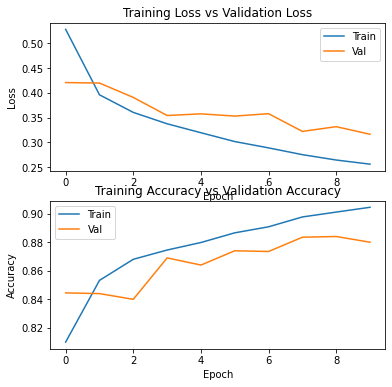

In [7]:
fig, axe = plt.subplots(2,1, figsize=(6,6))

axe[0].plot(history.history['loss'])
axe[0].plot(history.history['val_loss'])
axe[0].title.set_text('Training Loss vs Validation Loss')
axe[0].set_xlabel('Epoch')
axe[0].set_ylabel('Loss')
axe[0].legend(['Train', 'Val'])

axe[1].plot(history.history['accuracy'])
axe[1].plot(history.history['val_accuracy'])
axe[1].title.set_text('Training Accuracy vs Validation Accuracy')
axe[1].set_xlabel('Epoch')
axe[1].set_ylabel('Accuracy')
axe[1].legend(['Train', 'Val'])

In [8]:
score = head_model.evaluate(X_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8773000240325928


In [9]:
for layer in base_model.layers:
    layer.trainable = True

In [10]:
print("Number of layers in the base model: ", len(base_model.layers))

Number of layers in the base model:  19


In [11]:
#fine tune
fine_tune_at = 10

In [12]:
#freeze all the layers before the fine_tune_at layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False

In [13]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [14]:
len(base_model.trainable_variables)

12

In [15]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss= losses.sparse_categorical_crossentropy, metrics=['accuracy'])
#Compile the Model

In [16]:
history_fine = head_model.fit(X_train, y_train, batch_size = 64, epochs = 10, validation_data= (x_val, y_val)) 

Epoch 1/10
907/907 [==============================] - 28s 28ms/step - loss: 1.0210 - accuracy: 0.7071 - val_loss: 0.3979 - val_accuracy: 0.8470
Epoch 2/10
907/907 [==============================] - 25s 28ms/step - loss: 0.3532 - accuracy: 0.8728 - val_loss: 0.3135 - val_accuracy: 0.8825
Epoch 3/10
907/907 [==============================] - 25s 28ms/step - loss: 0.3167 - accuracy: 0.8871 - val_loss: 0.2818 - val_accuracy: 0.8920
Epoch 4/10
907/907 [==============================] - 25s 28ms/step - loss: 0.2920 - accuracy: 0.8978 - val_loss: 0.3969 - val_accuracy: 0.8520
Epoch 5/10
907/907 [==============================] - 25s 28ms/step - loss: 0.2749 - accuracy: 0.9034 - val_loss: 0.2764 - val_accuracy: 0.9040
Epoch 6/10
907/907 [==============================] - 25s 28ms/step - loss: 0.2801 - accuracy: 0.9033 - val_loss: 0.2595 - val_accuracy: 0.9080
Epoch 7/10
907/907 [==============================] - 25s 28ms/step - loss: 0.2516 - accuracy: 0.9113 - val_loss: 0.2387 - val_accuracy:

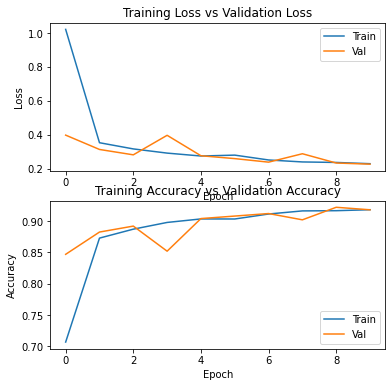

In [17]:
fig, axe = plt.subplots(2,1, figsize=(6,6))

axe[0].plot(history_fine.history['loss'])
axe[0].plot(history_fine.history['val_loss'])
axe[0].title.set_text('Training Loss vs Validation Loss')
axe[0].set_xlabel('Epoch')
axe[0].set_ylabel('Loss')
axe[0].legend(['Train', 'Val'])

axe[1].plot(history_fine.history['accuracy'])
axe[1].plot(history_fine.history['val_accuracy'])
axe[1].title.set_text('Training Accuracy vs Validation Accuracy')
axe[1].set_xlabel('Epoch')
axe[1].set_ylabel('Accuracy')
axe[1].legend(['Train', 'Val'])

In [18]:
test_loss, test_acc = head_model.evaluate(X_test, y_test, verbose=2)

print('\n', 'Test accuracy:', test_acc)

313/313 - 3s - loss: 0.2742 - accuracy: 0.9062 - 3s/epoch - 9ms/step

 Test accuracy: 0.9061999917030334


In [19]:
probability_model = tf.keras.Sequential([head_model, tf.keras.layers.Softmax()]) #Make prediction on the test dataset
predictions = probability_model.predict(X_test)

313/313 [==============================] - 2s 7ms/step


In [20]:
class_names = ["T-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneakers", "bag", "ankle boot"]

In [21]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid= (False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap= plt.cm.binary)

  predicted_label =np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{}  {:2.0f}%  ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                          color= color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid= False
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color = "#777777")
  plt.ylim = ([0,1])
  predicted_label =np.argmax(predictions_array)
  #print(predicted_label)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

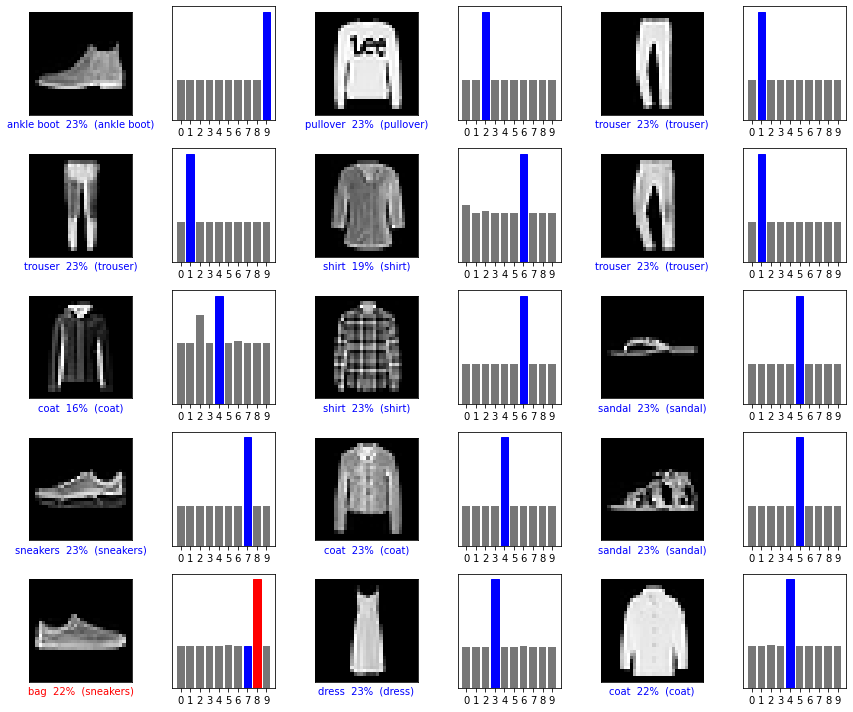

In [22]:
import numpy as np
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  #tmp = plot_value_array(i, predictions[i], y_test)
  #print(tmp)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

#Task 12




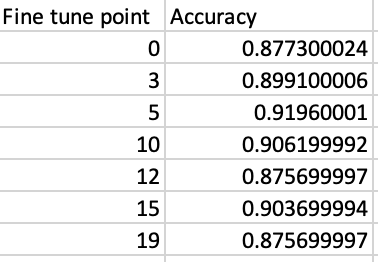




after trying different fine tune points, the performanace is the best when the fine tune point is 5, 
when the fine tune point is below 5 , there might have over fitting problem, when the fine tone point is more than 5, the model is under fitting.

In [ ]:
#Task 13 RNN structure

In [19]:
from keras.layers import LSTM, Dense, Activation

In [23]:
(x_train, y_train), (x_test, y_test)=tf.keras.datasets.mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0

11490434/11490434 [==============================] - 0s 0us/step


In [24]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape= (28,28)))
model.add(layers.SimpleRNN(128))
model.add(layers.Dense(10))

In [25]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train, batch_size=64, epochs=10, verbose = 2)

Epoch 1/10
938/938 - 16s - loss: 0.3760 - accuracy: 0.8866 - 16s/epoch - 17ms/step
Epoch 2/10
938/938 - 14s - loss: 0.1935 - accuracy: 0.9435 - 14s/epoch - 15ms/step
Epoch 3/10
938/938 - 14s - loss: 0.1527 - accuracy: 0.9559 - 14s/epoch - 15ms/step
Epoch 4/10
938/938 - 14s - loss: 0.1384 - accuracy: 0.9599 - 14s/epoch - 15ms/step
Epoch 5/10
938/938 - 16s - loss: 0.1248 - accuracy: 0.9632 - 16s/epoch - 17ms/step
Epoch 6/10
938/938 - 14s - loss: 0.1184 - accuracy: 0.9660 - 14s/epoch - 15ms/step
Epoch 7/10
938/938 - 14s - loss: 0.1138 - accuracy: 0.9677 - 14s/epoch - 15ms/step
Epoch 8/10
938/938 - 18s - loss: 0.1066 - accuracy: 0.9699 - 18s/epoch - 19ms/step
Epoch 9/10
938/938 - 16s - loss: 0.1051 - accuracy: 0.9701 - 16s/epoch - 17ms/step
Epoch 10/10
938/938 - 15s - loss: 0.0987 - accuracy: 0.9720 - 15s/epoch - 15ms/step


In [28]:
model.evaluate(x_test, y_test, batch_size=64)

157/157 [==============================] - 1s 4ms/step - loss: 0.1163 - accuracy: 0.9652


[0.11631999164819717, 0.9652000069618225]

Task 13
The result of LSTM is better than VGG16 with 96.52 accuracy.

Task 14

Data privacy and Professional ethics

1. there might be bias in the dataset
2. there is no Ownership of the data set
3. Transparency of the dataset is low as we have not check the data source, how it is collected and identify